# Xgcm Practice Plots

In [5]:
import xarray as xr
import numpy as np
import xgcm
from matplotlib import pyplot as plt
from matplotlib import gridspec
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

* Fundamental Concepts
    * axis - set of Xarray dimensions that lie along same axis of locally orthogonal coordinate system
    * grid – group of one or more Axis objects
        * Methods: 
        1. grid.interp(da, axis, **kwargs)
        1. grid.diff(da, axis, **kwargs)
        1. grid.cumsum(da, axis, **kwargs)
        


## Simple Grids

In [6]:
# Create dataset with x_c (cell center) and x_g (left cell edge)
ds = xr.Dataset(coords={'x_c': (['x_c',], np.arange(1,10)),
                        'x_g': (['x_g',], np.arange(0.5,9))})
ds

<xarray.Dataset>
Dimensions:  (x_c: 9, x_g: 9)
Coordinates:
  * x_c      (x_c) int64 1 2 3 4 5 6 7 8 9
  * x_g      (x_g) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5
Data variables:
    *empty*

In [7]:
from xgcm import Grid
grid = Grid(ds, coords={'X': {'center': 'x_c', 'left': 'x_g'}})

# xgcm understands relative location of different coords along x-axis
grid

<xgcm.Grid>
X Axis (periodic):
  * center   x_c --> left
  * left     x_g --> center

In [8]:
# Dataset has 2 different coordinates along same axis
ds = xr.Dataset(coords={'x_c': (['x_c',], np.arange(1, 10), {'axis': 'X'}), 
                        'x_g': (['x_g',], np.arange(0.5, 9), {'axis': 'X', 'c_grid_axis_shift': -0.5})})

ds

<xarray.Dataset>
Dimensions:  (x_c: 9, x_g: 9)
Coordinates:
  * x_c      (x_c) int64 1 2 3 4 5 6 7 8 9
  * x_g      (x_g) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5
Data variables:
    *empty*

In [9]:
# Can easily create a grid object
grid = Grid(ds)
grid

<xgcm.Grid>
X Axis (periodic):
  * center   x_c --> left
  * left     x_g --> center

## Core Grid Operations (diff, interp, cumsum)

In [10]:
SIN = np.sin
PI = np.pi

f = SIN(ds.x_c * 2* PI/9)
f

<xarray.DataArray 'x_c' (x_c: 9)>
array([ 6.42787610e-01,  9.84807753e-01,  8.66025404e-01,  3.42020143e-01,
       -3.42020143e-01, -8.66025404e-01, -9.84807753e-01, -6.42787610e-01,
       -2.44929360e-16])
Coordinates:
  * x_c      (x_c) int64 1 2 3 4 5 6 7 8 9

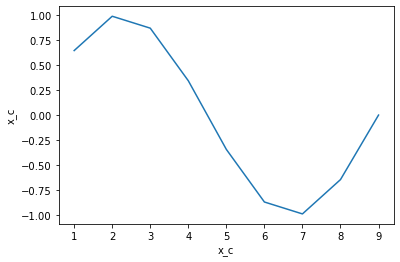

In [14]:
# Can easily plot grids
f.plot()

In [11]:
# Interpolate as follows
# Warning: xgcm does not perform input validation to verify that f is compatible w grid
f_interp = grid.interp(f, axis='X') # specify Dataset and axis label
f_interp

<xarray.DataArray (x_g: 9)>
array([ 3.21393805e-01,  8.13797681e-01,  9.25416578e-01,  6.04022774e-01,
        1.11022302e-16, -6.04022774e-01, -9.25416578e-01, -8.13797681e-01,
       -3.21393805e-01])
Coordinates:
  * x_g      (x_g) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5

In [16]:
f_diff = grid.diff(f, axis='X')
f_diff

<xarray.DataArray (x_g: 9)>
array([ 0.64278761,  0.34202014, -0.11878235, -0.52400526, -0.68404029,
       -0.52400526, -0.11878235,  0.34202014,  0.64278761])
Coordinates:
  * x_g      (x_g) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5

In [17]:
f_cumsum = grid.cumsum(f_diff, 'X')
f_cumsum

<xarray.DataArray (x_c: 9)>
array([ 0.64278761,  0.98480775,  0.8660254 ,  0.34202014, -0.34202014,
       -0.8660254 , -0.98480775, -0.64278761,  0.        ])
Coordinates:
  * x_c      (x_c) int64 1 2 3 4 5 6 7 8 9